In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "vlim"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
print(len(clusters))
print(len(shapes))

645
10084


In [5]:
# Print the numbers of galaxies that needed to be masked

assert np.sum(shapes[('All','e1')]==-9999)==0
assert np.sum(shapes[('All','e2')]==-9999)==0
assert np.sum(shapes['All','flags_select'])==0
assert np.sum(shapes[('All','PP')]<=0.55)==0

In [6]:
#masking
print(len(clusters))
print(len(shapes))

645
10084


In [7]:
center_ids=clusters[('Alt','Alt1','ID_CENT')]
center_mask=~np.in1d(shapes.index,center_ids)
shapes=shapes[center_mask]

# Stats of e1,e2

count    9439.000000
mean       -0.000578
std         0.238238
min        -0.883585
25%        -0.140168
50%         0.000829
75%         0.139745
max         0.946818
Name: (All, e2), dtype: float64

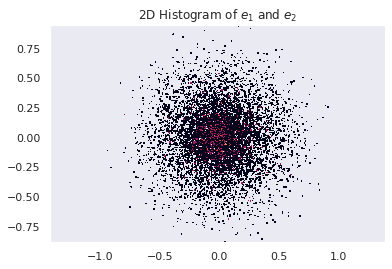

In [8]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count     9439.000000
mean         4.515928
std        447.235000
min      -2533.680733
25%         -1.021269
50%         -0.004149
75%          0.937060
max      43081.033765
dtype: float64

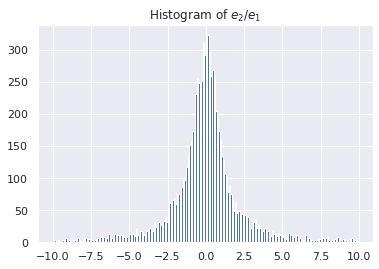

In [9]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [10]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [11]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [12]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:4.481448e+01 
StdE:2.667806e-01 


In [13]:
def plt_phi(df):
    phi_1d=df[('All','phi')]
    plt.hist(phi_1d,bins=9,weights=df[('All','PP')],histtype="step",density=True)
    plt.title("Histogram of $\phi_{sat}$ weighted by probability") 
    pd.Series(phi_1d).describe()

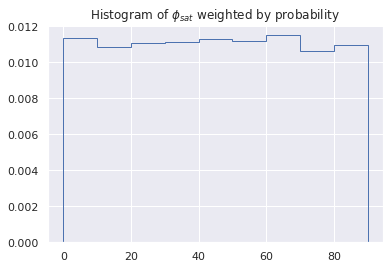

In [14]:
plt_phi(shapes)

# Get e

## Statistics of e1 and e2

In [15]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    9439.000000
mean       -0.001539
std         0.240413
min        -0.944842
25%        -0.143093
50%        -0.001324
75%         0.137643
max         0.916601
Name: (All, e1), dtype: float64

In [16]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    9439.000000
mean       -0.000578
std         0.238238
min        -0.883585
25%        -0.140168
50%         0.000829
75%         0.139745
max         0.946818
Name: (All, e2), dtype: float64

In [17]:
# np.save("/home/cz136/project/sa/data/{}/e_array".format(dir_string),e_list)

In [18]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=-3.970920e-03, std_mean=2.477324e-03


count    9439.000000
mean       -0.003971
std         0.240683
min        -0.949640
25%        -0.145502
50%        -0.004530
75%         0.136941
max         0.908173
Name: (All, ep), dtype: float64

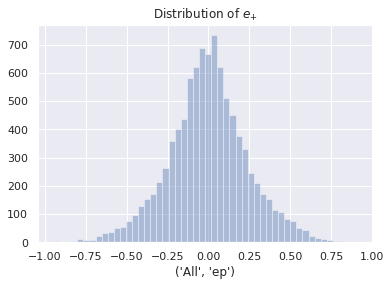

In [19]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=-4.479949e-04, std_mean=2.449059e-03


count    9439.000000
mean       -0.000448
std         0.237937
min        -0.945247
25%        -0.138466
50%        -0.000439
75%         0.137069
max         0.940252
Name: (All, ex), dtype: float64

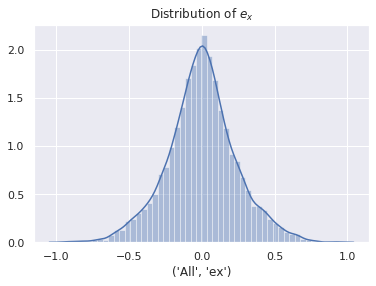

In [20]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()

# Percentile Data

In [21]:
def get_R_percent(lower,upper):
    R_lower=shapes[('All','R')].quantile(lower)
    R_upper=shapes[('All','R')].quantile(upper)
    R_selected=shapes[(shapes[('All','R')]>=R_lower)&(shapes[('All','R')]<=R_upper) ]
    return(R_selected)

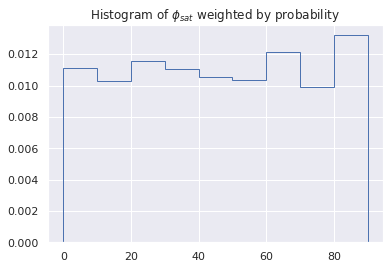

In [22]:
plt_phi(get_R_percent(0,0.1))

Text(0.5, 1.0, '$e_+$ for R percentile [0,5%]')

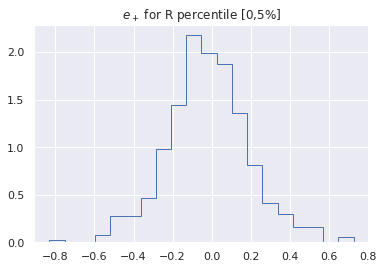

In [23]:
plt.hist(get_R_percent(0,0.05)[('All','ep')],bins=20,density=True,histtype="step")
plt.title(r"$e_+$ for R percentile [0,5%]")

In [24]:
get_R_percent(0,0.11)[('All','ep')].mean()

-0.003956589902726125